## Importance Sampling

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from random import random
from scipy.optimize import curve_fit

In [2]:
# Define Gaussian and Uniform functions
def gaussian(x, args):
    mu, sig,area = args
    return area*1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
def uniform(x,args):
    low, high, area = args
    return np.where((x < low) | (x > high), 0, 1/(high-low)) * area   

<IPython.core.display.Javascript object>


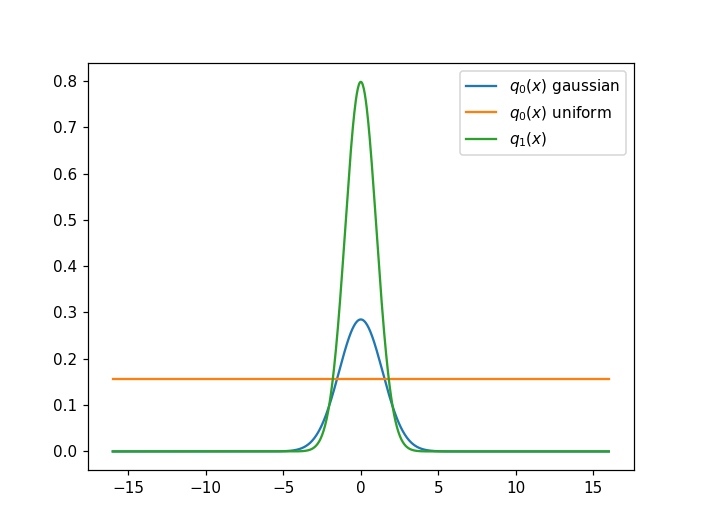

In [3]:
x = np.linspace(-16,16,num=1001)

## q_0 functions
# mu, sigma, area
q_0 = (0,1.4,1)
y_0 = gaussian(x,q_0)

# low, high, area
q_0_u = (-16,16,5) 
y_0_u = uniform(x, q_0_u)

## q_1 function
# mu, sigma, area
q_1 = (0,1,2)
y_1 = gaussian(x,q_1)

plt.figure(1)
plt.plot(x,y_0, label='$q_{0}(x)$ gaussian')
plt.plot(x,y_0_u, label='$q_{0}(x)$ uniform')
plt.plot(x,y_1, label='$q_{1}(x)$')
plt.legend()
plt.savefig('functions.png', bbox_inches = 'tight', dpi = 400) 
#plt.show()

In [4]:
# sampling from p_0
sampsize = 4000
s = np.random.normal(q_0[0], q_0[1], sampsize)
su = np.random.uniform(q_0_u[0], q_0_u[1], sampsize)

# find Z1
def w(x):
    return gaussian(x,q_1) / gaussian(x,q_0)
def wu(x):
    return gaussian(x,q_1) / uniform(x, q_0_u)

#z1 = w(s).mean() * q_0[2]
#z1u = wu(su).mean() * q_0_u[2]

In [5]:
z1_list = []
z1u_list = []
for i in range(1,sampsize+1):
    s = np.random.normal(q_0[0], q_0[1], i)
    su = np.random.uniform(q_0_u[0], q_0_u[1], i)

    z1_list.append(w(s).mean() * q_0[2])
    z1u_list.append(wu(su).mean() * q_0_u[2])

Area Z1  after 4000 iterations: 1.9981449161708889
Area Z1u after 4000 iterations: 1.9603268158542095
std of w: 0.7671615066283325
std of wu: 1.7173734399867095


<IPython.core.display.Javascript object>


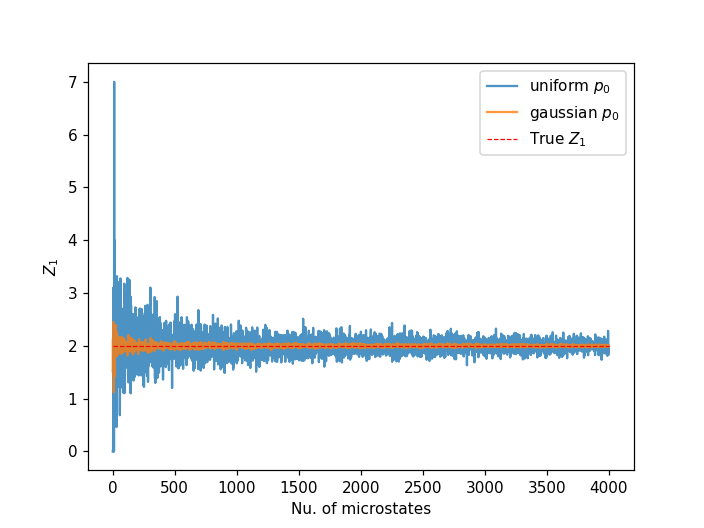

In [6]:
print('Area Z1  after {} iterations: {}'.format(len(z1_list), z1_list[-1]))
print('Area Z1u after {} iterations: {}'.format(len(z1u_list), z1u_list[-1]))
print('std of w: {}'.format(w(s).std()))
print('std of wu: {}'.format(wu(s).std()))

plt.figure(2)
plt.hlines(q_1[2], 0, len(z1_list), colors='r', linestyles='--',lw=0.8, label='True $Z_{1}$', zorder=10)
plt.plot(z1u_list, label='uniform $p_{0}$', alpha= 0.8)
plt.plot(z1_list, label='gaussian $p_{0}$', alpha= 0.8)
plt.legend()
plt.xlabel('Nu. of microstates')
plt.ylabel('$Z_{1}$')
plt.savefig('running_average.png', bbox_inches = 'tight', dpi = 400) 
#plt.show()

## Thermodynamic Integration

<IPython.core.display.Javascript object>


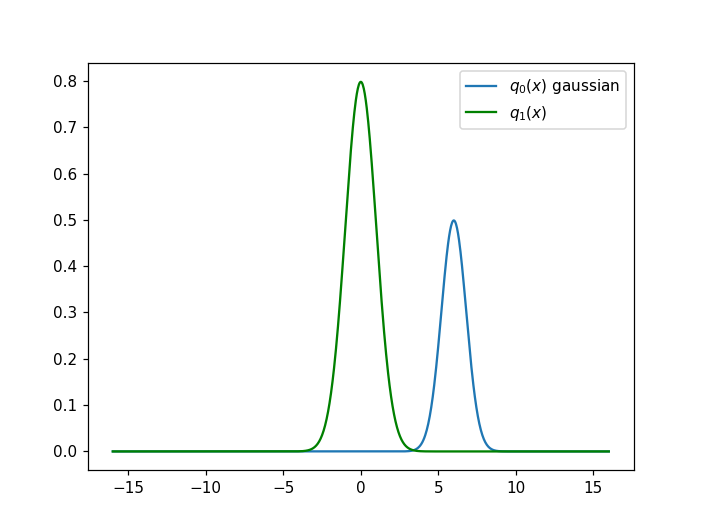

In [7]:
x = np.linspace(-16,16,num=1001)

## q_0 function
# mu, sigma, area
q_0 = (6,0.8,1)
y_0 = gaussian(x,q_0)

## q_1 function
# mu, sigma, area
q_1 = (0,1,2)
y_1 = gaussian(x,q_1)

plt.figure()
plt.plot(x,y_0, label='$q_{0}(x)$ gaussian')
plt.plot(x,y_1,c='g', label='$q_{1}(x)$')
plt.legend()
plt.savefig('functions_TI.png', bbox_inches = 'tight', dpi = 400) 
#plt.show()

Area Z1  after 4000 iterations: 0.001205866127598681
std of w: 0.028354461872659


<IPython.core.display.Javascript object>


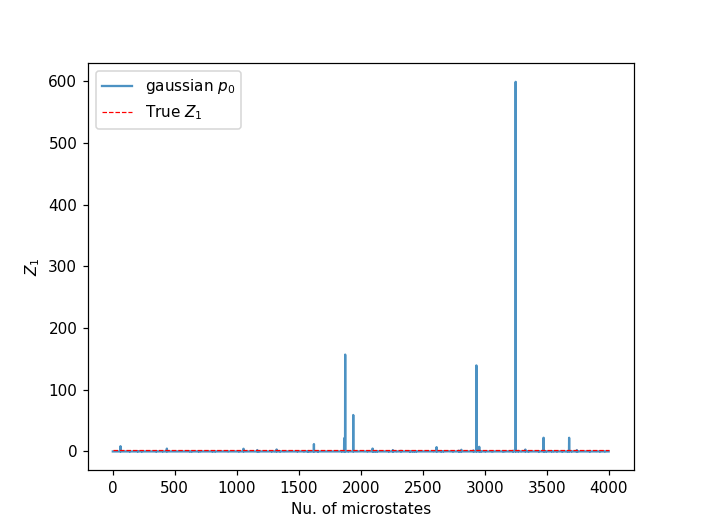

In [8]:
z1_list = []
for i in range(1,sampsize+1):
    s = np.random.normal(q_0[0], q_0[1], i)
    z1_list.append(w(s).mean() * q_0[2])
    
print('Area Z1  after {} iterations: {}'.format(len(z1_list), z1_list[-1]))
print('std of w: {}'.format(w(s).std()))

plt.figure()
plt.hlines(q_1[2], 0, len(z1_list), colors='r', linestyles='--',lw=0.8, label='True $Z_{1}$', zorder=10)
plt.plot(z1_list, label='gaussian $p_{0}$', alpha= 0.8)
plt.legend()
plt.xlabel('Nu. of microstates')
plt.ylabel('$Z_{1}$')
plt.savefig('running_average_TI.png', bbox_inches = 'tight', dpi = 400) 
#plt.show()

<IPython.core.display.Javascript object>


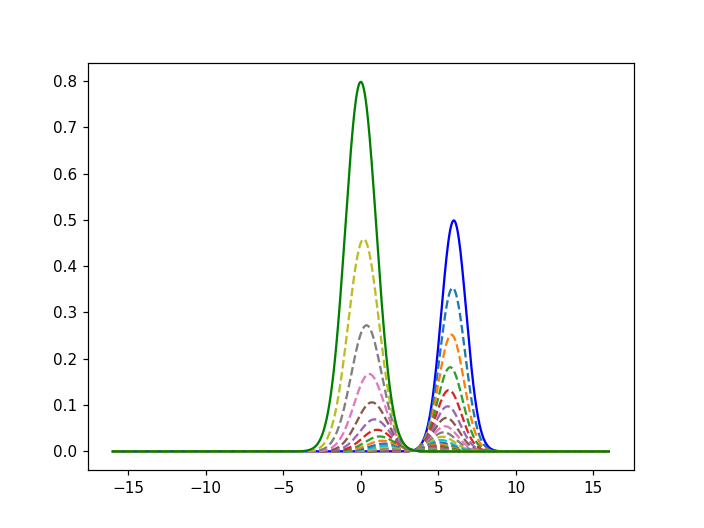

In [9]:
# lets take q_0 and p_0 as gaussians.
# this will make p_0t Gaussians.

def q_t(q_0, q_1, t):
    # x is already defined
    
    # Gaussian function to fit
    def func(x, mu, sig,area):
        return area*1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
    
    q_t = np.multiply(gaussian(x,q_0)**(1-t), gaussian(x,q_1)**(t))
    popt, pcov = curve_fit(func, x, q_t)
#    print(popt)
    return q_t, popt

plt.figure()
for c,i in enumerate(np.linspace(0,1,num=51)):
    if c ==0:
        plt.plot(x, q_t(q_0, q_1, i)[0], c='b')
        continue
    if c ==50:
        plt.plot(x, q_t(q_0, q_1, i)[0], c='g')
        continue
    plt.plot(x, q_t(q_0, q_1, i)[0],'--')
plt.savefig('intermediate_functions_TI.png', bbox_inches = 'tight', dpi = 400) 
#plt.show()

In [10]:
pt_samplesize = np.arange(80,4000,80) # number of samplesize at each pt. Make a single element array if needed.
TI_z1_list = []
for pt_size in pt_samplesize:
    integrand_list = []
    t_list = np.linspace(0,1,num=51)
    for t in t_list:
        muu, sigg , _ = q_t(q_0, q_1, t)[1]
        s = np.random.normal(muu,sigg, pt_size)
        integrand = np.log(np.divide(gaussian(s,q_1), gaussian(s,q_0))).mean()
        integrand_list.append(integrand)
    integral = np.trapz(integrand_list, x=t_list)
    TI_z1 = np.exp(integral)*q_0[2]
    TI_z1_list.append(TI_z1)
    
    if pt_size == pt_samplesize[-1]:
        print('Real partition function Z1     : {}'.format(q_1[2]))
        print('TI result partition function Z1: {}'.format(TI_z1))    

Real partition function Z1     : 2
TI result partition function Z1: 2.021286659923088


<IPython.core.display.Javascript object>


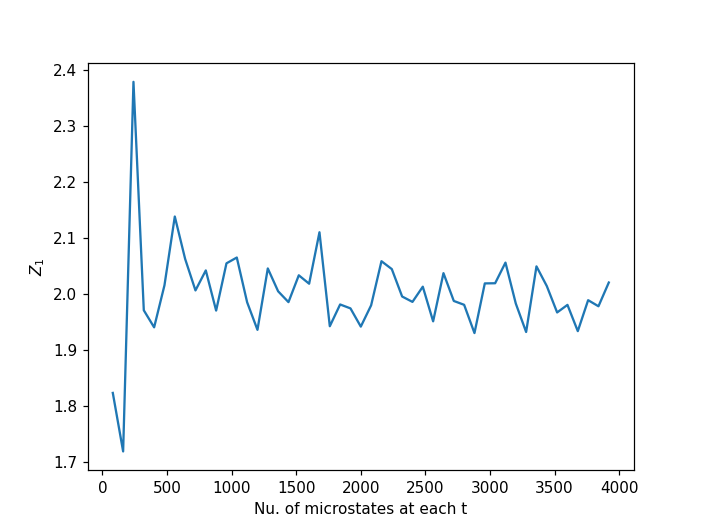

In [11]:
plt.figure()
#plt.title('TI result partition function Z1: {}'.format(round(TI_z1,3)))
plt.plot(pt_samplesize,TI_z1_list)
plt.xlabel('Nu. of microstates at each t')
plt.ylabel('$Z_{1}$')
plt.savefig('running_average_TI_t.png', bbox_inches = 'tight', dpi = 400) 
plt.show()

<IPython.core.display.Javascript object>


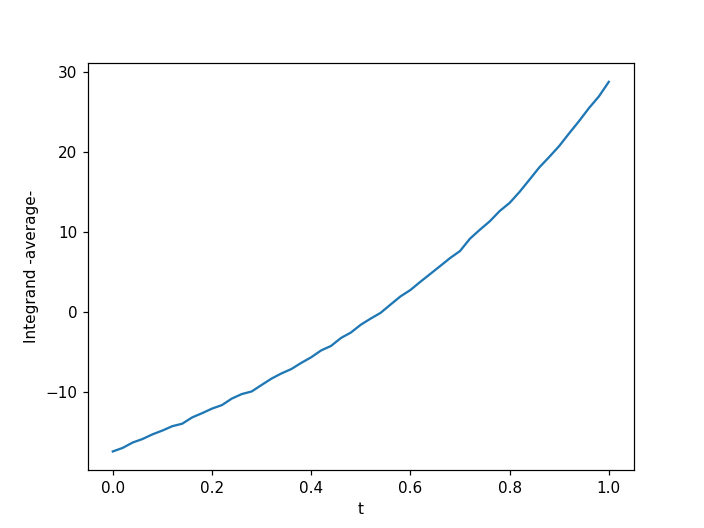

In [12]:
# plot final element of pt_samplesize 's' integrand plot 
plt.figure()
plt.plot(t_list, integrand_list)
plt.xlabel('t')
plt.ylabel('Integrand -average-')
plt.savefig('integrand_TI.png', bbox_inches = 'tight', dpi = 400) 
plt.show()